In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
# os.makedirs("/content/drive/MyDrive/simulated_grbs_krr/third_slot/", exist_ok=True)

Mounted at /content/drive


In [ ]:
# os.makedirs("/content/drive/MyDrive/simulated_grbs_krr/first_slot/", exist_ok=True)
def run_analysis(GRB_Name):
    GRB_Name = GRB_Name.strip()
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    density_factor=1
    trimmed_data=pd.read_csv("/content/drive/MyDrive/simulated_grbs_2/"+GRB_Name+".csv", verbose=False, skip_blank_lines=True, sep=',', dtype=float)
    positive_ts_err = trimmed_data["pos_t_err"]
    negative_ts_err = trimmed_data["neg_t_err"]
    positive_fluxes_err = trimmed_data["pos_flux_err"]
    negative_fluxes_err = trimmed_data["neg_flux_err"]
    ts, fluxes = trimmed_data["t"].to_numpy(), trimmed_data["flux"].to_numpy()
    log_ts, log_fluxes = np.log10(ts), np.log10(fluxes)

    pos_fluxes= fluxes + positive_fluxes_err
    neg_fluxes= fluxes + negative_fluxes_err
    pos_log_fluxes = np.log10(pos_fluxes)
    neg_log_fluxes = np.log10(neg_fluxes)

    recon_t = np.geomspace(np.min(ts), np.max(ts), density_factor*len(ts))

    #ABOVE VALUE IN LOG SCALE
    log_recon_t = np.log10(recon_t)
    log_recon_t = log_recon_t.reshape(-1,1)


    plt.xlabel("Time")
    plt.ylabel("Flux")
    plt.errorbar(log_ts, log_fluxes, linestyle='none', yerr=[log_fluxes - neg_log_fluxes, pos_log_fluxes - log_fluxes], marker='o', capsize=5, label="Trimmed Data")
    plt.title(GRB_Name)
    print("\n-----ORIGINAL GRB-----\n")
    plt.savefig(f"/content/drive/MyDrive/simulated_grbs_krr/second_slot/{GRB_Name}_original.png")
    plt.show()
    # import os
    # print(os.listdir("/content/drive/MyDrive/krr_on_simulated"))
    reconstructed_data=pd.read_csv("/content/drive/MyDrive/krr_on_simulated_2/"+GRB_Name+".csv", skip_blank_lines=True, sep=',', dtype=float)
    t_reconstructed=reconstructed_data["t"]
    log_t_reconstructed=np.log10(t_reconstructed)
    flux_reconstructed=reconstructed_data["flux"]
    log_flux_reconstructed=np.log10(flux_reconstructed)

    willingale_data=pd.read_csv("/content/drive/MyDrive/simulated_grbs_2/willingale_parameters.csv")
    row = willingale_data[willingale_data["GRB"] == GRB_Name]

    logTa_willingale=row["log_Ta"].values[0]
    logFa_willingale=row["log_Fa"].values[0]

    lcr_data=pd.read_csv("/content/drive/MyDrive/krr_simulated_lcr_2.csv")
    row = lcr_data[lcr_data["GRBID"] == GRB_Name]
    if row.empty:
        print(f"GRB {GRB_Name} not found in lcr_data")
        return
    logTa_true = row["logTa"].values[0]
    logTa_pred = row["logTa_new"].values[0]
    logFa_true = row["logFa"].values[0]
    logFa_pred = row["logFa_new"].values[0]

    plt.xlabel("log(t)")
    plt.ylabel("log(flux)")
    plt.scatter(log_t_reconstructed, log_flux_reconstructed, s=20, label='Reconstructed Data')
    plt.scatter(logTa_true, logFa_true, color='green', marker='*', s=120, label='True Ta, Fa')
    plt.scatter(logTa_willingale, logFa_willingale, color='yellow', marker='o', label='Willingale Ta, Fa')
    plt.scatter(logTa_pred, logFa_pred, color='red', marker='x', s=100, label='Reconstructed Ta, Fa')
    plt.legend()
    plt.title("Analysis of Reconstructed " + GRB_Name)
    plt.grid(True, which="both", ls="--")
    plt.savefig(f"/content/drive/MyDrive/simulated_grbs_krr/second_slot/{GRB_Name}_rec.png")
    plt.show()

/tmp/ipython-input-4279067055.py:8: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  trimmed_data=pd.read_csv("/content/drive/MyDrive/simulated_grbs_2/"+GRB_Name+".csv", verbose=False, skip_blank_lines=True, sep=',', dtype=float)



-----ORIGINAL GRB-----



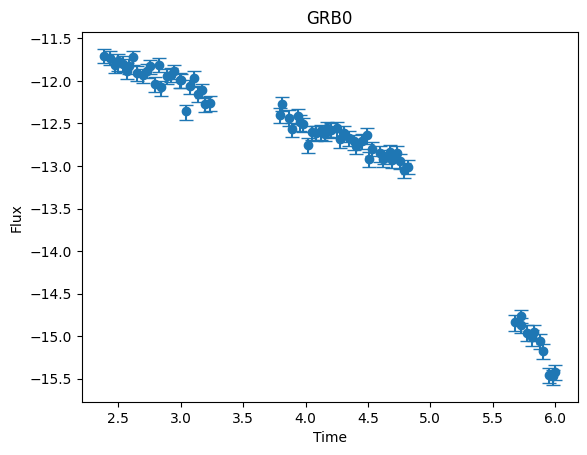

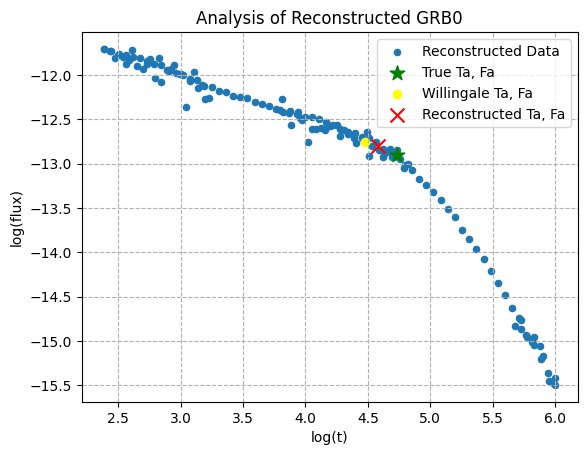

/tmp/ipython-input-4279067055.py:8: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  trimmed_data=pd.read_csv("/content/drive/MyDrive/simulated_grbs_2/"+GRB_Name+".csv", verbose=False, skip_blank_lines=True, sep=',', dtype=float)



-----ORIGINAL GRB-----



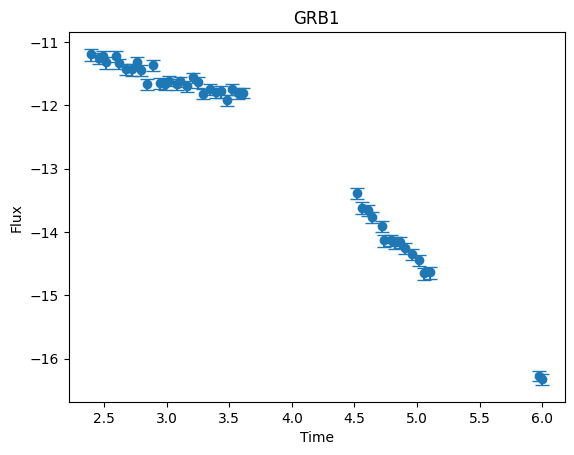

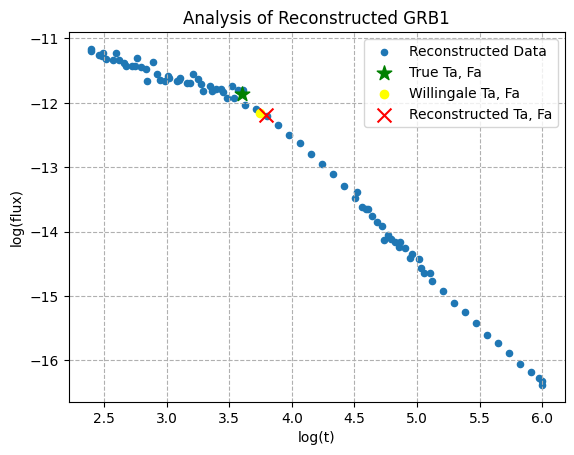

/tmp/ipython-input-4279067055.py:8: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  trimmed_data=pd.read_csv("/content/drive/MyDrive/simulated_grbs_2/"+GRB_Name+".csv", verbose=False, skip_blank_lines=True, sep=',', dtype=float)



-----ORIGINAL GRB-----



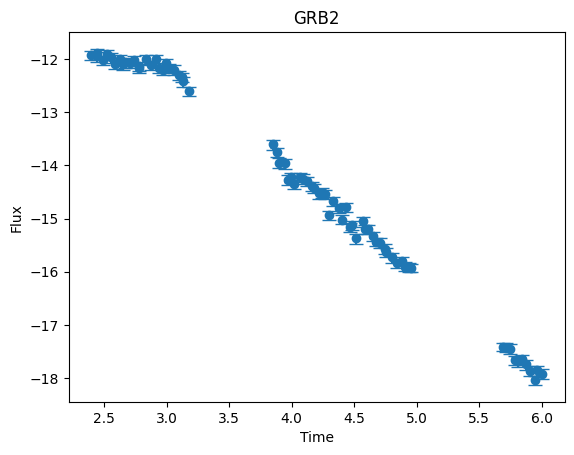

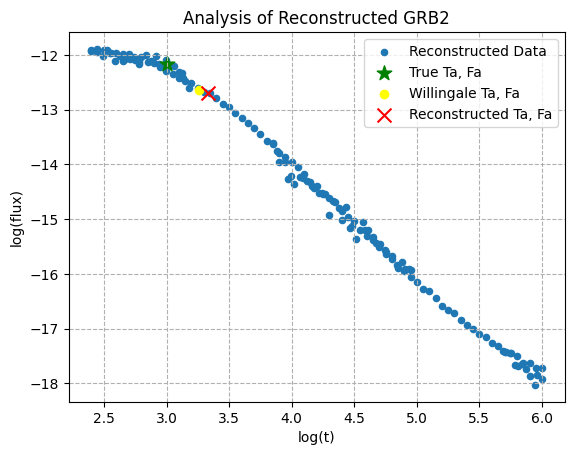

/tmp/ipython-input-4279067055.py:8: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  trimmed_data=pd.read_csv("/content/drive/MyDrive/simulated_grbs_2/"+GRB_Name+".csv", verbose=False, skip_blank_lines=True, sep=',', dtype=float)



-----ORIGINAL GRB-----



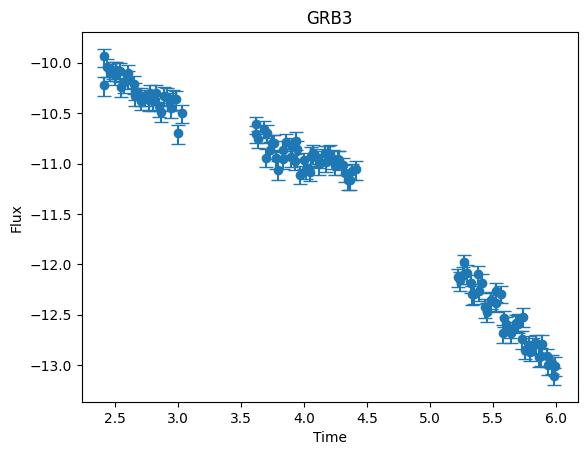

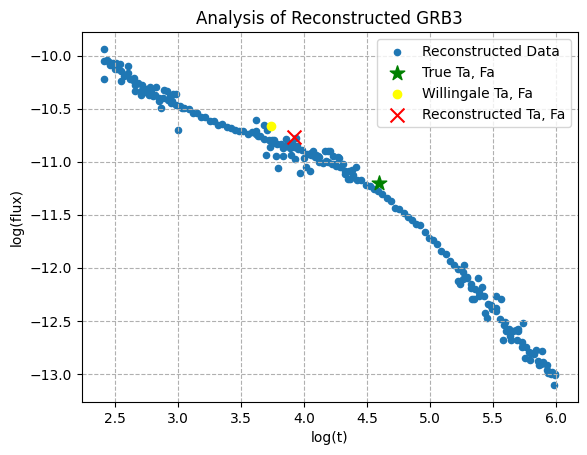

/tmp/ipython-input-4279067055.py:8: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  trimmed_data=pd.read_csv("/content/drive/MyDrive/simulated_grbs_2/"+GRB_Name+".csv", verbose=False, skip_blank_lines=True, sep=',', dtype=float)



-----ORIGINAL GRB-----



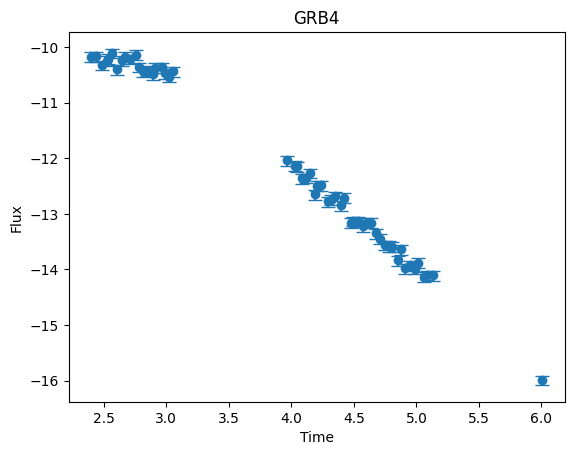

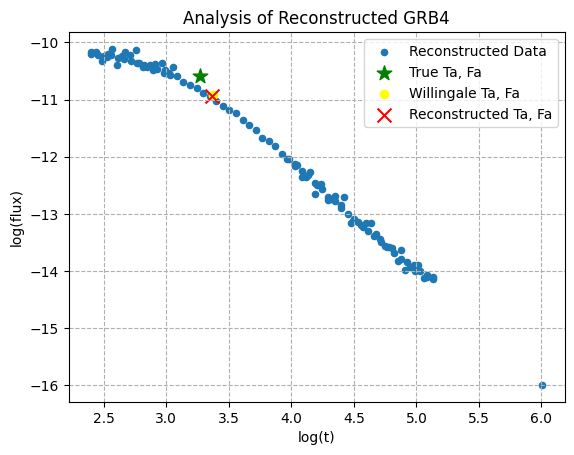

/tmp/ipython-input-4279067055.py:8: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  trimmed_data=pd.read_csv("/content/drive/MyDrive/simulated_grbs_2/"+GRB_Name+".csv", verbose=False, skip_blank_lines=True, sep=',', dtype=float)



-----ORIGINAL GRB-----



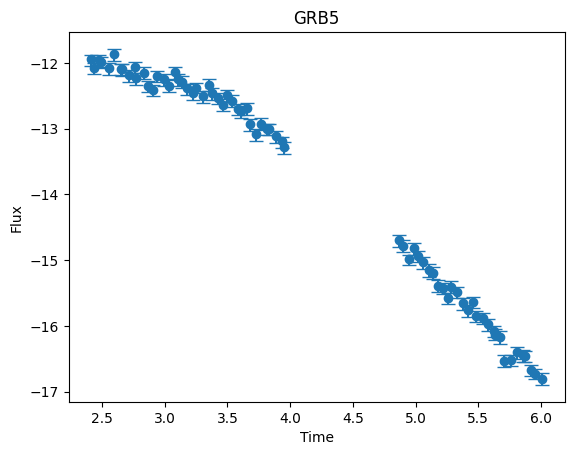

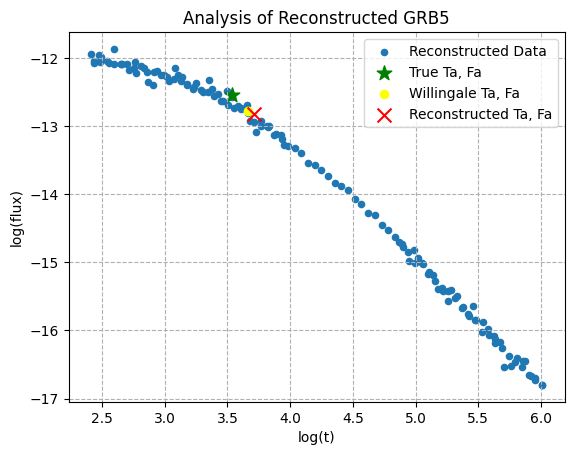

/tmp/ipython-input-4279067055.py:8: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  trimmed_data=pd.read_csv("/content/drive/MyDrive/simulated_grbs_2/"+GRB_Name+".csv", verbose=False, skip_blank_lines=True, sep=',', dtype=float)



-----ORIGINAL GRB-----



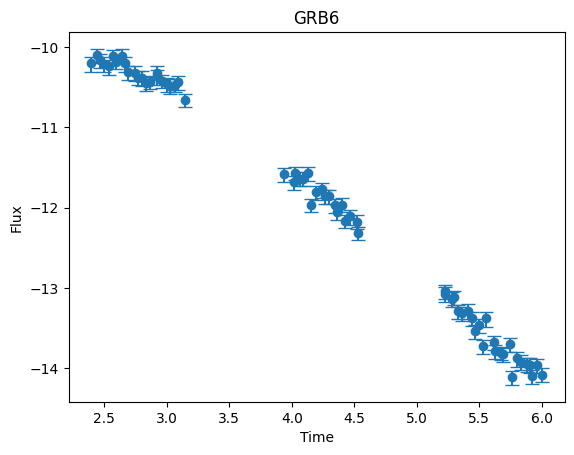

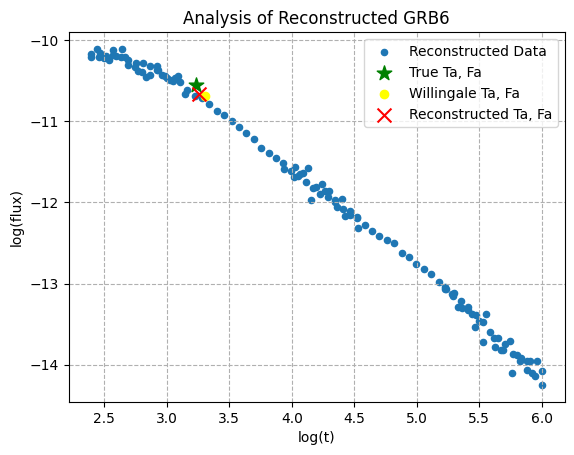

/tmp/ipython-input-4279067055.py:8: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  trimmed_data=pd.read_csv("/content/drive/MyDrive/simulated_grbs_2/"+GRB_Name+".csv", verbose=False, skip_blank_lines=True, sep=',', dtype=float)



-----ORIGINAL GRB-----



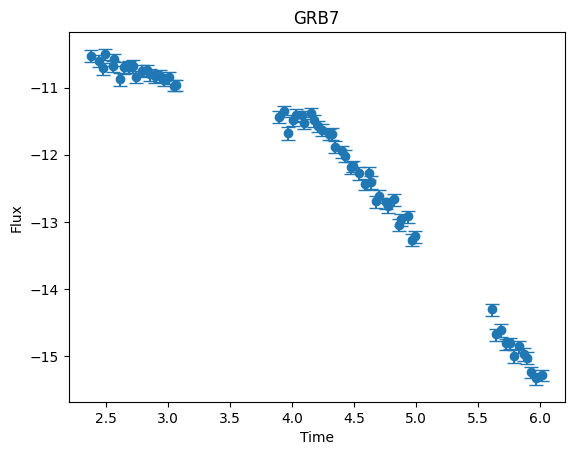

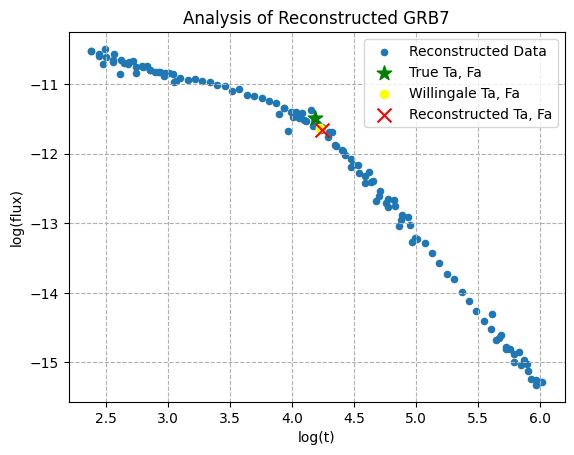

/tmp/ipython-input-4279067055.py:8: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  trimmed_data=pd.read_csv("/content/drive/MyDrive/simulated_grbs_2/"+GRB_Name+".csv", verbose=False, skip_blank_lines=True, sep=',', dtype=float)



-----ORIGINAL GRB-----



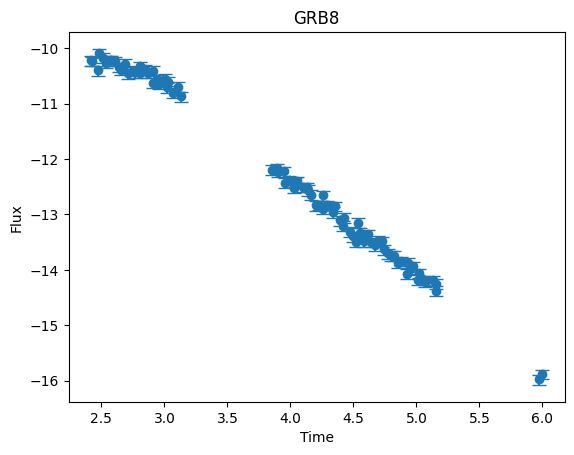

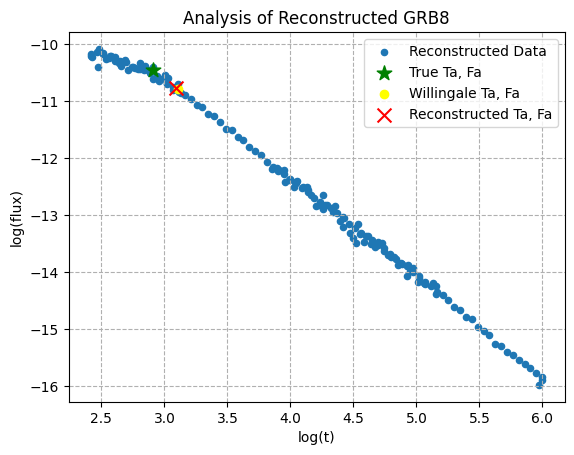

/tmp/ipython-input-4279067055.py:8: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  trimmed_data=pd.read_csv("/content/drive/MyDrive/simulated_grbs_2/"+GRB_Name+".csv", verbose=False, skip_blank_lines=True, sep=',', dtype=float)



-----ORIGINAL GRB-----



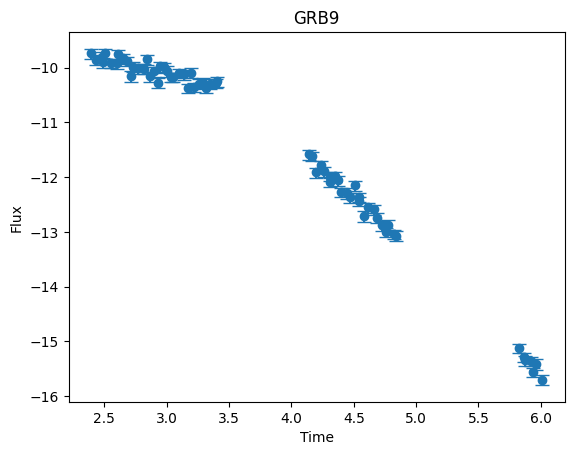

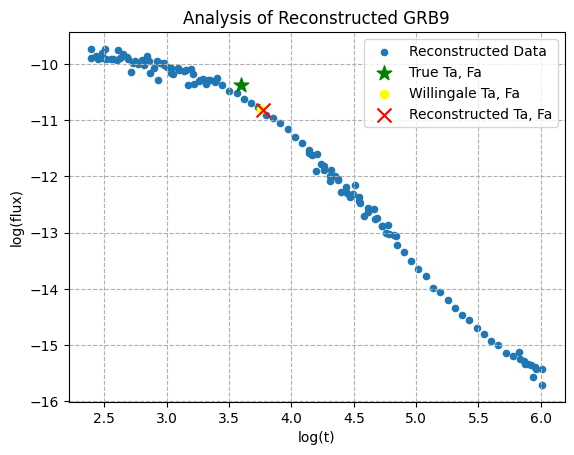

In [ ]:
GRBs=['GRB0', 'GRB1', 'GRB2', 'GRB3','GRB4','GRB5','GRB6','GRB7','GRB8','GRB9']
for grb in GRBs:
  run_analysis(grb)

In [ ]:
!pip install lmfit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from lmfit import Parameters, minimize
import matplotlib.pyplot as plt

def log_Willingale_if(logt, logFa, alpha, logTa):
    if logt < logTa:
        return logFa + np.log10(np.e) * alpha * (1.0 - 10**logt / 10**logTa)
    else:
        return logFa - alpha * (logt - logTa)

def log_Willingale(logt, logFa, alpha, logTa):
    # y = np.zeros_like(logt)
    # for j in range(len(logt)):
    #     y[j] = log_Willingale_if(logt[j], logFa, alpha, logTa)
    # return y
    y = np.zeros(logt.shape)
    for j in range(len(y)):
        y[j]=log_Willingale_if(logt[j], logFa, alpha, logTa)
    return y


def get_residual(params, x, y):
    log_Ta = params['log_T_a'].value
    log_Fa = params['log_F_a'].value
    alpha = params['alpha'].value
    model = log_Willingale(x, log_Fa, alpha, log_Ta)
    return y - model


def extract_willingale_params(GRB_Name):
    df = pd.read_csv(f"/content/drive/MyDrive/simulated_grbs_2/{GRB_Name}.csv")
    ts = df["t"].to_numpy()
    fluxes = df["flux"].to_numpy()
    log_ts = np.log10(ts)
    log_fluxes = np.log10(fluxes)


    params = Parameters()
    params.add("log_F_a", value=-11, min=-20, max=-5)
    params.add("alpha", value=1.5, min=0.1, max=4)
    params.add("log_T_a", value=3.5, min=2.5, max=6)

    # Fit
    result = minimize(get_residual, params, args=(log_ts, log_fluxes))

    logFa = result.params["log_F_a"].value
    alpha = result.params["alpha"].value
    logTa = result.params["log_T_a"].value

    print(f"{GRB_Name}: logFa = {logFa:.3f}, alpha = {alpha:.3f}, logTa = {logTa:.3f}")
    return {
        "GRB": GRB_Name,
        "log_Fa": logFa,
        "log_Ta": logTa,
        "alpha": alpha
    }
GRBs=['GRB0', 'GRB1', 'GRB2', 'GRB3','GRB4','GRB5','GRB6','GRB7','GRB8','GRB9']
param_list=[]
for i in GRBs:
  param=extract_willingale_params(i)
  param_list.append(param)

param_df = pd.DataFrame(param_list)
param_df.to_csv("/content/drive/MyDrive/simulated_grbs_2/willingale_parameters.csv", index=False)

GRB0: logFa = -12.756, alpha = 1.690, logTa = 4.480
GRB1: logFa = -12.151, alpha = 1.841, logTa = 3.748
GRB2: logFa = -12.647, alpha = 1.960, logTa = 3.261
GRB3: logFa = -10.666, alpha = 0.994, logTa = 3.734
GRB4: logFa = -10.923, alpha = 1.884, logTa = 3.371
GRB5: logFa = -12.783, alpha = 1.684, logTa = 3.664
GRB6: logFa = -10.686, alpha = 1.274, logTa = 3.302
GRB7: logFa = -11.638, alpha = 2.063, logTa = 4.227
GRB8: logFa = -10.798, alpha = 1.744, logTa = 3.106
GRB9: logFa = -10.808, alpha = 2.113, logTa = 3.754
